<a href="https://colab.research.google.com/github/SubhaDeeptaS/MLProjects/blob/main/multiple_linear_regression_with_onehotencoding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multiple Linear Regression Model

In [ ]:
import numpy as np 
import pandas as pd
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Importing the Data

In [ ]:
df = pd.read_csv('FuelConsumption.csv')
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


We can see that the column **FUELTYPE** contains categorical values. This column can be used later in the model.

# Checking for Missing Data

In [ ]:
df.isnull().sum()

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

We don't have any null values so that is good. We can proceed further to visualize the relations between the columns of the dataset.

# Visualizing the Data

In [ ]:
new_df = df[['ENGINESIZE','CYLINDERS','FUELTYPE','FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
new_df.head()

,ENGINESIZE,CYLINDERS,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,Z,9.9,6.7,8.5,196
1,2.4,4,Z,11.2,7.7,9.6,221
2,1.5,4,Z,6.0,5.8,5.9,136
3,3.5,6,Z,12.7,9.1,11.1,255
4,3.5,6,Z,12.1,8.7,10.6,244


In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ENGINESIZE            1067 non-null   float64
 1   CYLINDERS             1067 non-null   int64  
 2   FUELTYPE              1067 non-null   object 
 3   FUELCONSUMPTION_CITY  1067 non-null   float64
 4   FUELCONSUMPTION_HWY   1067 non-null   float64
 5   FUELCONSUMPTION_COMB  1067 non-null   float64
 6   CO2EMISSIONS          1067 non-null   int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 58.5+ KB


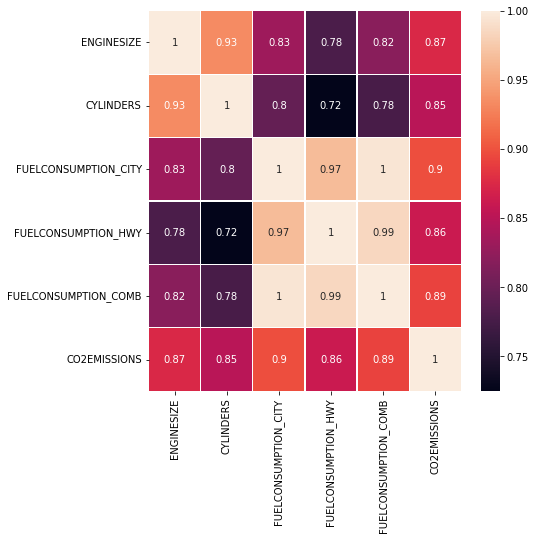

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.color_palette("YlOrBr", as_cmap=True)
fig = plt.figure(figsize = (7,7))
sns.heatmap(new_df.corr(), annot = True, yticklabels = True, linewidths = 0.2)

There is strong correlation of the dependent variable **CO2EMISSIONS** with other columns in the dataframe

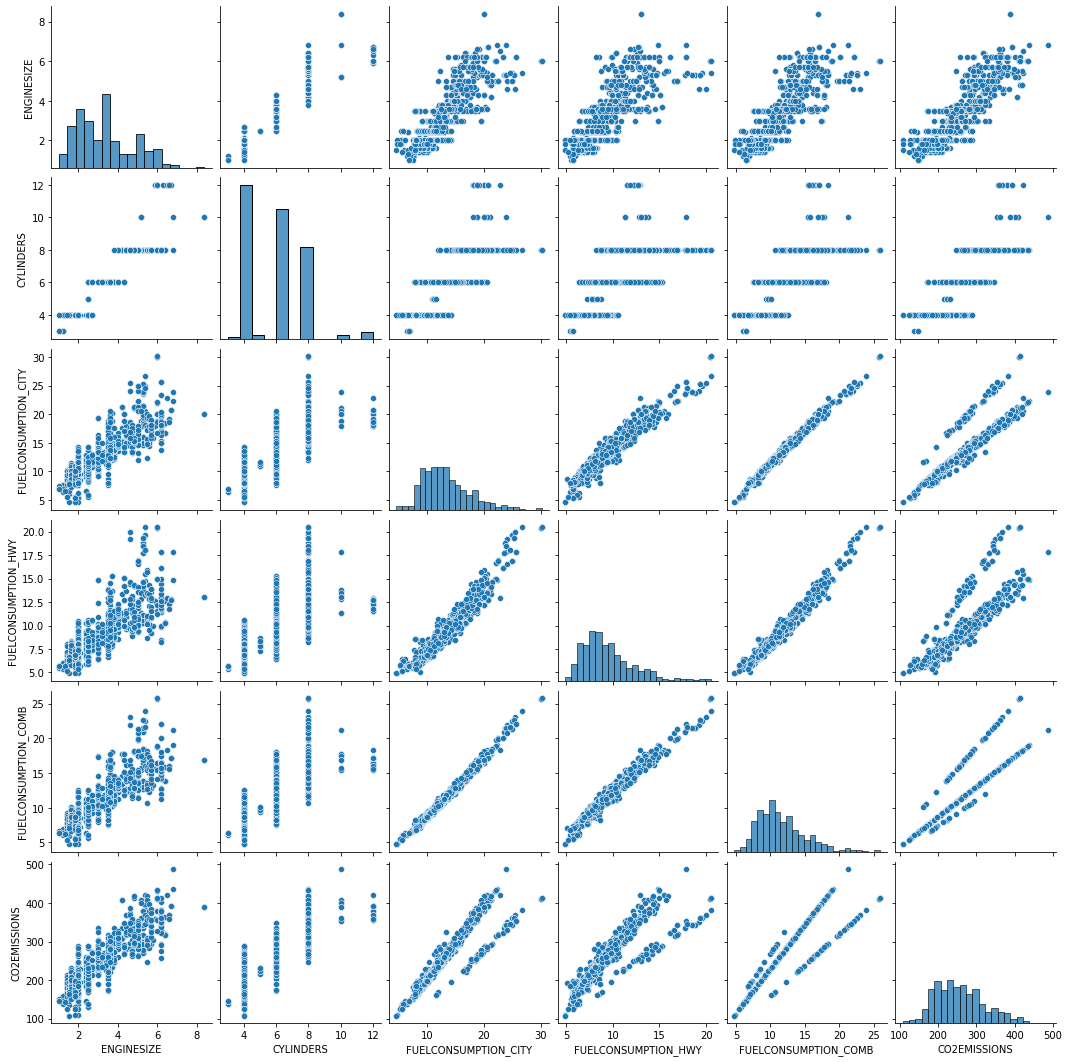

In [ ]:
sns.pairplot(new_df)

# Multiple Linear Regression Model

In [ ]:
#Independent Variables
X = new_df.drop('CO2EMISSIONS', axis = 1).values   
#Dependent Variable
y = new_df['CO2EMISSIONS'].values

In [ ]:
new_df['FUELTYPE'].unique()

array(['Z', 'D', 'X', 'E'], dtype=object)

Since the column **FUELTYPE** is a catergorical variable and the ML model cannot understand the strings so we use OneHotEncoder to encode it. 

In [ ]:
#Encoding the categorical variable using OneHotEncoding
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [2])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

**Splitting the data into training and testing sets**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

**Applying the Linear Regression model**

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

**The coefficients of the model**

In [ ]:
regressor.coef_

array([ 52.57891398, -96.3018887 ,  21.95113865,  21.77183607,
         0.79093879,   0.99812467,  -6.10535459,  -6.7018903 ,
        33.76143196])

**The intercept of the model**

In [ ]:
regressor.intercept_

-10.898944547917381

**Predicting the data using our model**

In [ ]:
y_pred = regressor.predict(X_test)

**Using r2 score to check the validity of our predictions. We have got a high value of r2 which indicates that our model has predicted values very close to the test set.**

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
print('Mean Absolute Error = ',mean_absolute_error(y_test,y_pred))
print('R2 score = ',r2_score(y_test,y_pred))

Mean Absolute Error =  3.5679465915958377
R2 score =  0.9881507263178071
